In [1]:
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
from amftrack.util.dbx import read_saved_dropbox_state,get_dropbox_folders


/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [56]:
dir_drop = "/DATA/MYRISTATE/Network_extraction"
all_folders_drop = get_dropbox_folders(dir_drop)


2023-05-16 14:35:12,043-[INFO]- dropbox:390 -> Refreshing access token.
2023-05-16 14:35:12,186-[INFO]- dropbox:474 -> Request to files/list_folder
2023-05-16 14:35:12,997-[INFO]- dropbox:474 -> Request to files/list_folder/continue
2023-05-16 14:35:13,599-[INFO]- dropbox:474 -> Request to files/list_folder/continue
['data/myristate/network_extraction/46_20230221/20230307_1358_plate01', 'data/myristate/network_extraction/62_20220324/20230328_1202_plate01', 'data/myristate/network_extraction/57_20220310/20230328_1143_plate01', 'data/myristate/network_extraction/41_20230221/20230328_1011_plate01', 'data/myristate/network_extraction/101_20220310/20230328_1010_plate01']


In [57]:
name_job = "Hanna"
run_parallel_transfer(
        "from_drop.py",
        [directory_targ],
        all_folders_drop,
        50,
        "4:00:00",
        "staging",
        cpus=1,
        node="staging",
        name_job=name_job,
    )

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.03125 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2752800


In [4]:
plates = list(all_folders_drop['unique_id'])

In [66]:
plates

['46_20230221', '62_20220324', '57_20220310', '41_20230221', '101_20220310']

In [2]:
directory_targ = os.path.join(directory_scratch, "stitch_temp2") + "/"
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/39 [00:00<?, ?it/s]

In [61]:
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
folders.columns

Index(['total_path', 'Plate', 'PrincePos', 'root', 'strain', 'medium', 'split',
       'Pbait', 'CrossDate', 'Temperature',
       '/Img/TileConfiguration.txt.registered',
       '/Analysis/skeleton_compressed.mat',
       '/Analysis/skeleton_masked_compressed.mat',
       '/Analysis/skeleton_pruned_compressed.mat', '/Analysis/transform.mat',
       '/Analysis/transform_corrupt.mat',
       '/Analysis/skeleton_realigned_compressed.mat',
       '/Analysis/nx_graph_pruned.p', '/Analysis/nx_graph_pruned_width.p',
       '/Analysis/nx_graph_pruned_labeled.p', 'date', 'folder',
       'InoculationDate', 'unique_id', 'datetime'],
      dtype='object')

In [3]:
folders = all_folders.loc[all_folders['medium'].str.contains("Myr")]
folders['unique_id']

3      46_20230301
11     62_20220324
12     57_20220310
15     41_20230221
17    101_20220310
Name: unique_id, dtype: object

In [51]:
dir_drop = "DATA/MYRISTATE/Network_extraction"

delete = True
run_parallel_transfer(
    "toward_drop.py",
    [dir_drop, delete],
    folders,
    50,
    "4:00:00",
    "staging",
    cpus=1,
    node="staging",
    name_job="hannah",
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.03125 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2752744


In [4]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    reconstruct_image_from_general,
    plot_full,
)


In [5]:
folders = folders.sort_values(by="datetime")
folders
exp = Experiment(directory_targ)
exp.load(folders.iloc[1:2])
exp.dates.sort()
for t in range(exp.ts):
    exp.load_tile_information(t)
    
for t in range(exp.ts):
    exp.load_tile_information(t)

load_graphs(exp, directory_targ, post_process=False)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2023-03-28 10:10:00


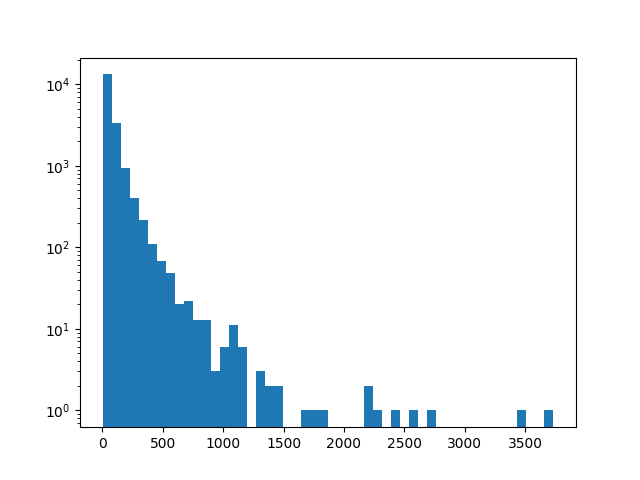

In [34]:
import numpy as np
import matplotlib.pyplot as plt
lengths = [edge.length_um(0) for edge in edges]
fig,ax = plt.subplots()
ax.hist(lengths,50)
ax.set_yscale("log")

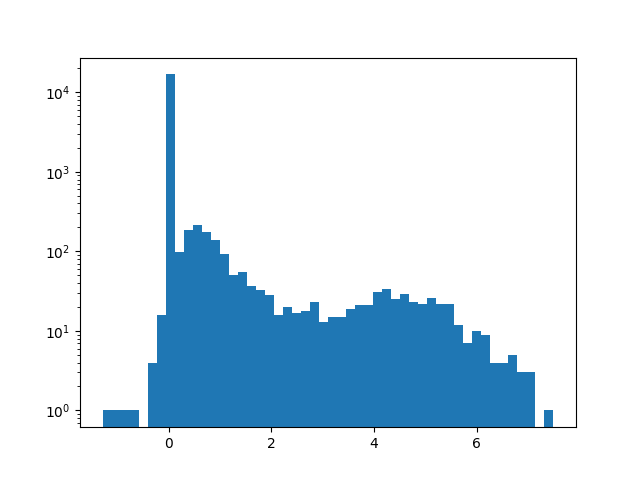

In [37]:
import numpy as np
import matplotlib.pyplot as plt
lengths = [edge.width(0) for edge in edges]
fig,ax = plt.subplots()
ax.hist(lengths,50)
ax.set_yscale("log")

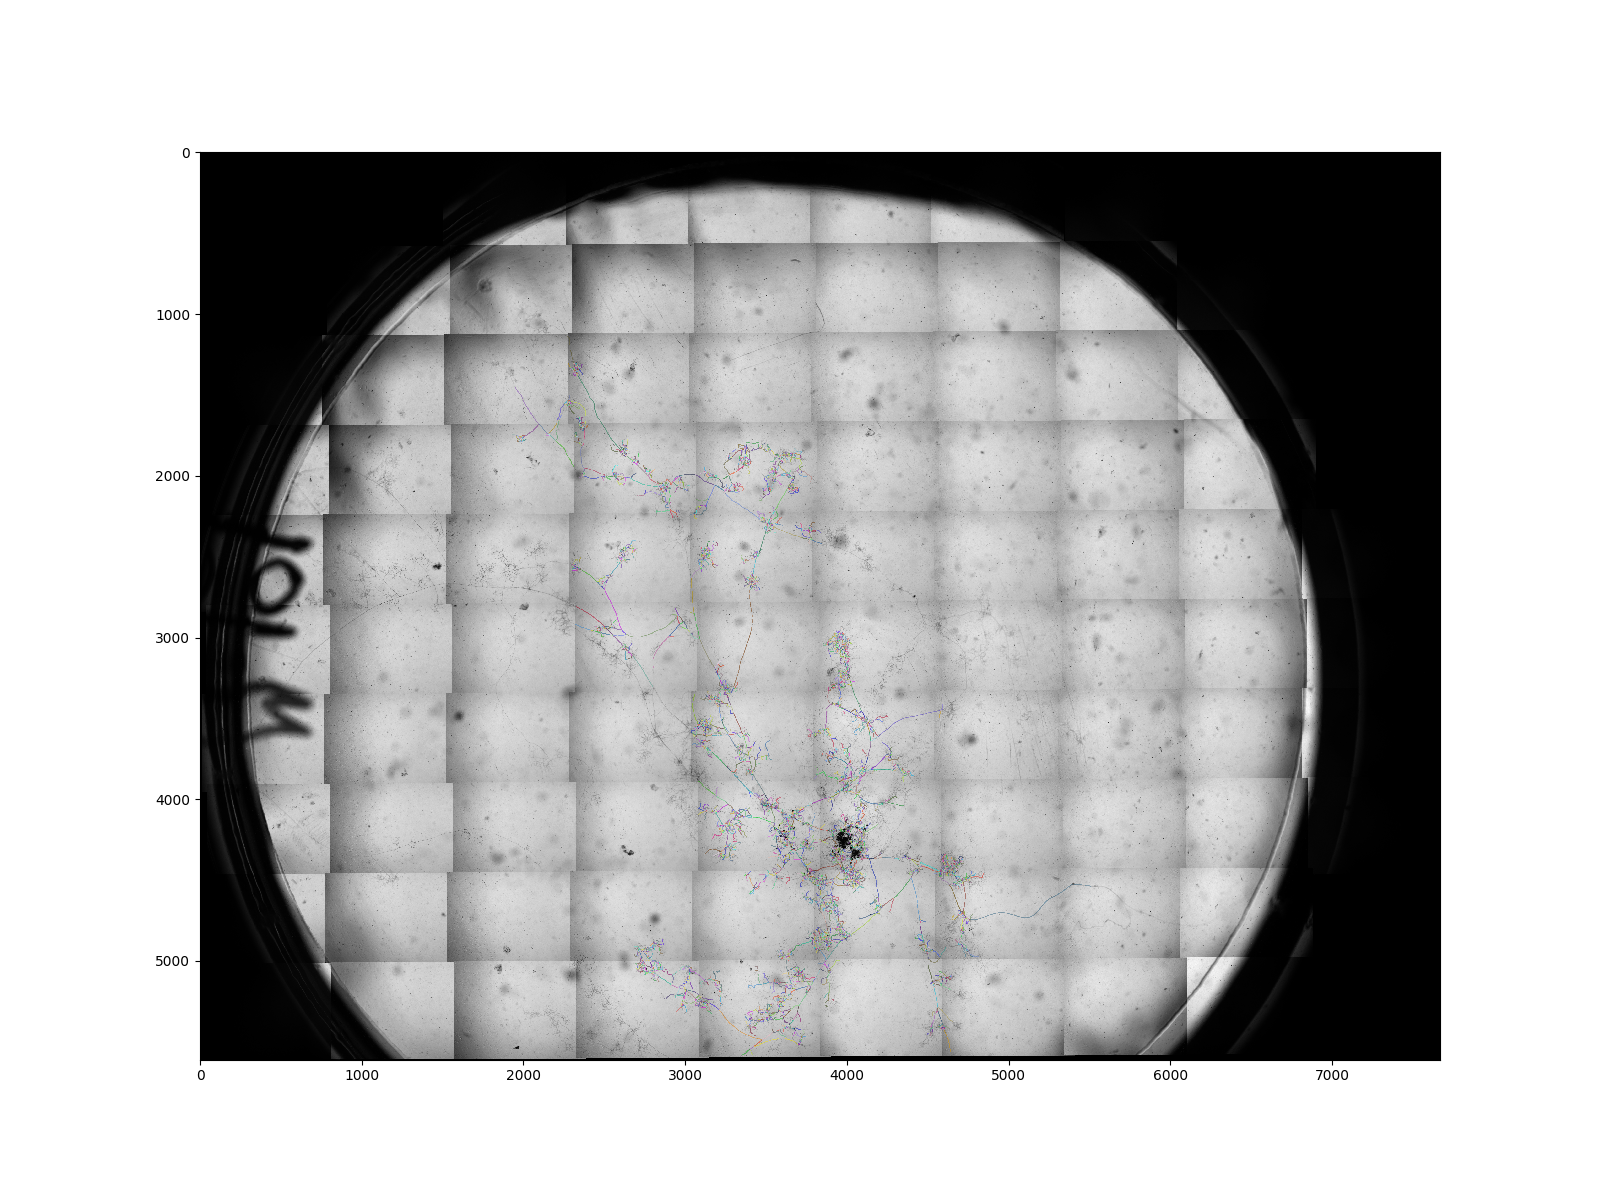

<AxesSubplot:>

In [6]:
%matplotlib widget

edges = get_all_edges(exp, t)
edges_plot = [edge for edge in edges if edge.width(0)>2]
edges_plot = edges

plot_full(
    exp,
    t,
    downsizing=5,
    edges=edges_plot,
    dilation=4,
    prettify=False,
    figsize=(16, 12),
    # dpi=390,
    node_size=1.5,
    # save_path=path,
)

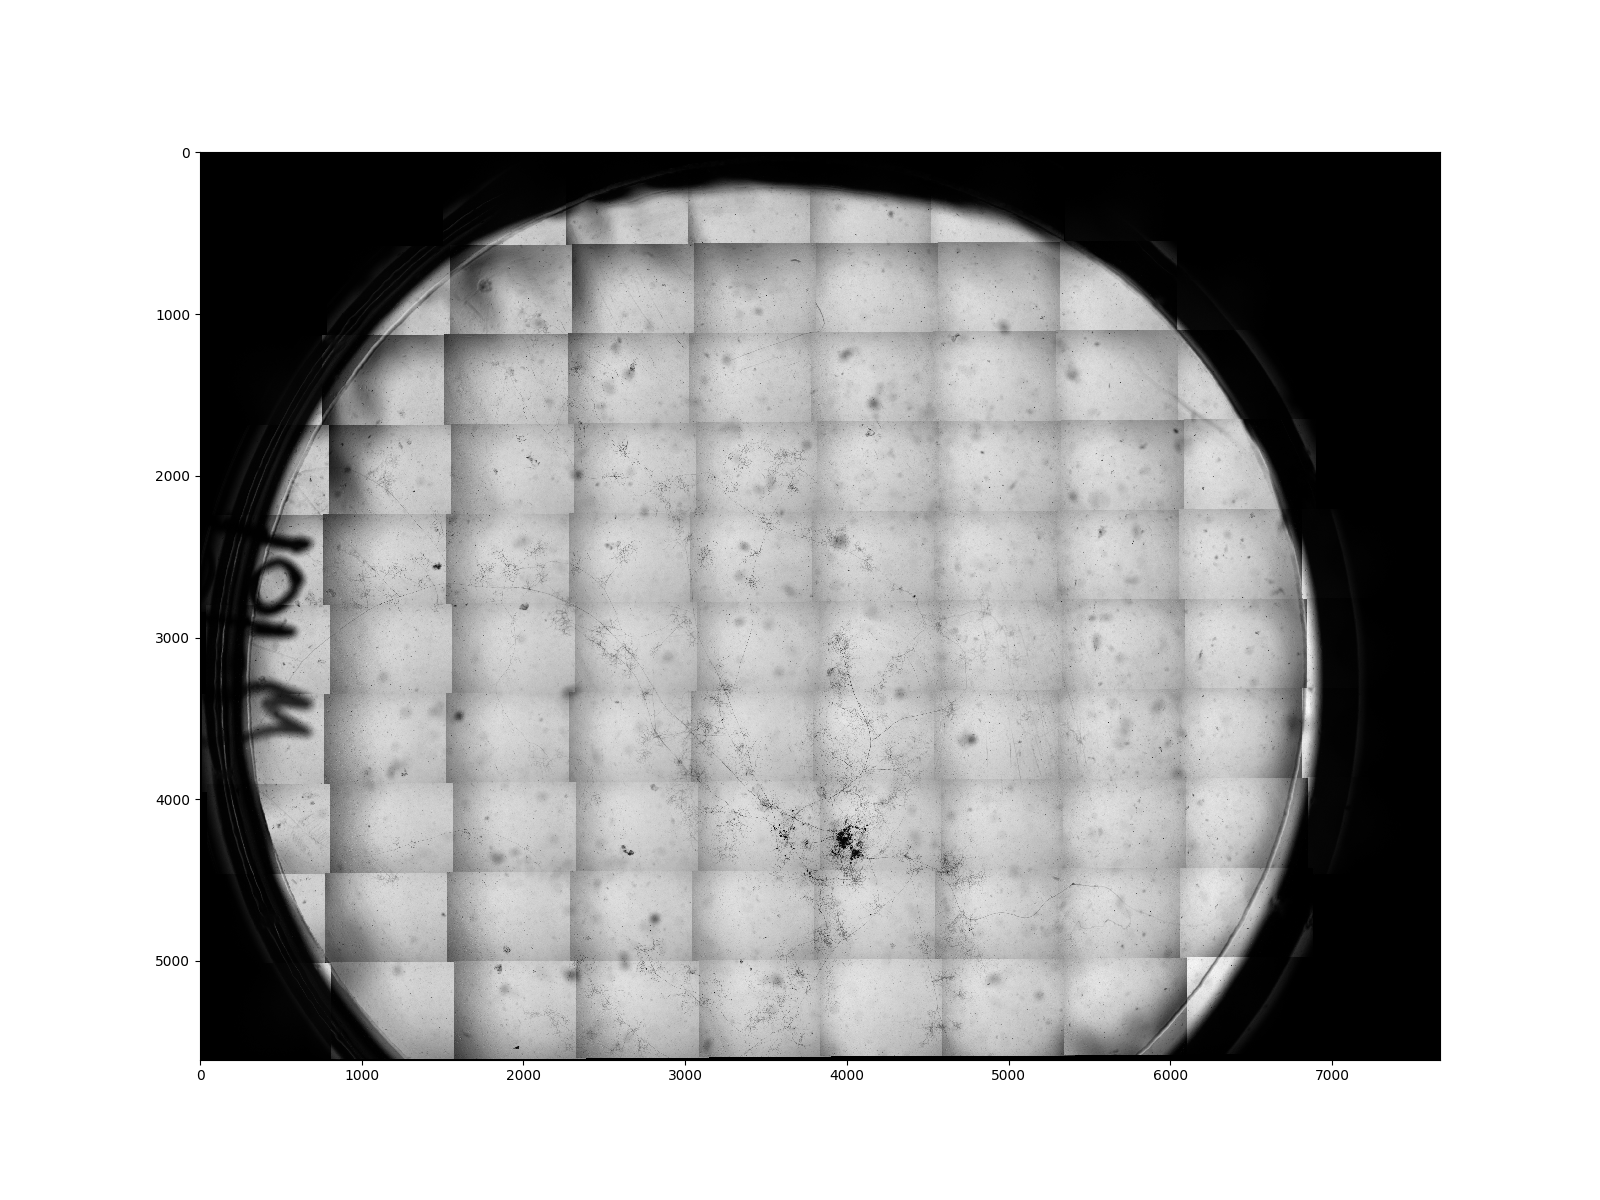

<AxesSubplot:>

In [82]:
plot_full(
    exp,
    t,
    downsizing=5,
    dilation=4,
    prettify=False,
    figsize=(16, 12),
    # dpi=390,
    node_size=1.5,
    # save_path=path,
)

In [13]:
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
folders = folders.loc[folders["/Img/TileConfiguration.txt.registered"] == True]
name_job = "Hannah"
# num_parallel = 100
# time = "6:00:00"
# hyph_width = 30
# perc_low = 93
# perc_high = 99.5
# args = [hyph_width, perc_low, perc_high, directory_targ]
# run_parallel(
#     "extract_skel_2.py",
#     args,
#     folders,
#     num_parallel,
#     time,
#     "skeletonization",
#     cpus=128,
#     node="fat",
#     name_job=name_job,
# )
num_parallel = 100
time = "4:00"
args = [directory_targ]
run_parallel(
    "compress_image.py",
    args,
    folders,
    num_parallel,
    time,
    "compress",
    cpus=128,
    node="fat",
    name_job=name_job,
)
# folders

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1.0 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2716868


In [8]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')

import pandas as pd
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)


import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    sparse_to_doc,
)
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
directory = directory_targ
# select = all_folders.loc[(all_folders['folder'].isin([ '20210929_0308_Plate21',
#  '20210929_0912_Plate21']))]
select = folders
folder_list = list(select["folder"])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((1, 1), np.uint8)
itera = 1
start = 0

# start = choice(range(len(folder_list)))
finish = start + 2
for folder in folder_list[start:finish]:
    # print(folder)
    path_snap = directory + folder
    skel_info = read_mat(path_snap + "/Analysis/skeleton_compressed.mat")
    skel = skel_info["skeleton"]
    skels.append(cv2.dilate(skel.astype(np.uint8), kernel, iterations=itera))
    im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
    #     im = imageio.imread(path_snap+'/StitchedImage.tif')
    #     im = cv2.resize(im,(skel.shape[1],skel.shape[0]))
    #     M = np.float32([
    # 	[1, 0, 0],
    # 	[0, 1, -117]])
    #     im = cv2.warpAffine(im,M,(im.shape[1], im.shape[0]))
    ims.append(im)

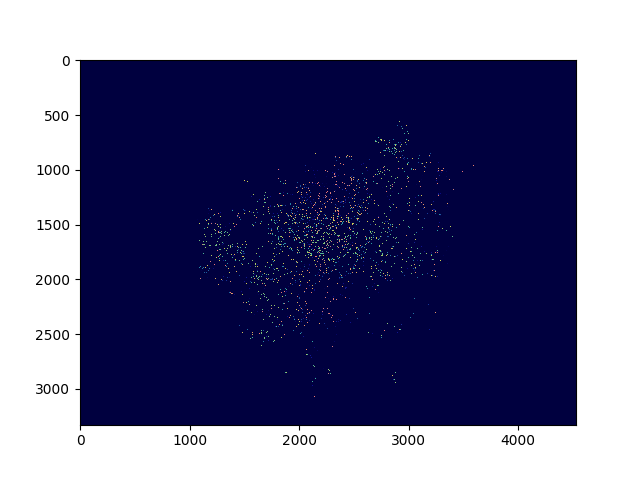

In [24]:
plt.close("all")
start = 1
finish = start + 1
for i in range(start, finish):
    plot_t_tp1([], [], None, None, skels[i], skels[i])

In [74]:
plates

['46_20230221', '62_20220324', '57_20220310', '41_20230221', '101_20220310']

In [75]:
name_job = "Hannah"

# name_job = f"one_shot_{time_ns()}.sh"

run_launcher(
    "stitcher.py",
    [directory_targ, name_job, 30],
    plates,
    "12:00:00",
    dependency=True,
    name_job=name_job,
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.03125 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2752930
